# NAML project - Stroke prediction
###  Cavallini - Eusebio

In [5674]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5675]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5676]:
new_cols = ["id", "gender", "age", "hypertension", "heart-disease", "ever-married", "work-type", "Residence-type", "avg-glucose-level", "bmi", "smoking-status", "stroke"]

cathegorical_features = ['gender', 'ever-married', 'work-type', 'Residence-type', 'smoking-status']
binary_features = ['hypertension', 'heart-disease']
numerical_features = ['age', 'avg-glucose-level', 'bmi']

df.columns = new_cols

In [5677]:
df.head()

,id,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5678]:
df.drop('id', axis=1, inplace=True) # drop id column because it is not useful

In [5679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart-disease      5110 non-null   int64  
 4   ever-married       5110 non-null   object 
 5   work-type          5110 non-null   object 
 6   Residence-type     5110 non-null   object 
 7   avg-glucose-level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking-status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Data Pre-processing

In [5680]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart-disease          0
ever-married           0
work-type              0
Residence-type         0
avg-glucose-level      0
bmi                  201
smoking-status         0
stroke                 0
dtype: int64

In [5681]:
df.dropna(inplace=True)

In [5682]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart-disease        0
ever-married         0
work-type            0
Residence-type       0
avg-glucose-level    0
bmi                  0
smoking-status       0
stroke               0
dtype: int64

As we can clearly see the BMI column presents some N/A values that we have removed. 

In [5683]:
df = df[df['age'] >= 18]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4073 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4073 non-null   object 
 1   age                4073 non-null   float64
 2   hypertension       4073 non-null   int64  
 3   heart-disease      4073 non-null   int64  
 4   ever-married       4073 non-null   object 
 5   work-type          4073 non-null   object 
 6   Residence-type     4073 non-null   object 
 7   avg-glucose-level  4073 non-null   float64
 8   bmi                4073 non-null   float64
 9   smoking-status     4073 non-null   object 
 10  stroke             4073 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 381.8+ KB


In the paper is clearly stated that only the patients above 18 years old were considered. We have removed the patients below 18 years old.

In [5684]:
df = df[df['smoking-status'] != 'Unknown']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3256 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3256 non-null   object 
 1   age                3256 non-null   float64
 2   hypertension       3256 non-null   int64  
 3   heart-disease      3256 non-null   int64  
 4   ever-married       3256 non-null   object 
 5   work-type          3256 non-null   object 
 6   Residence-type     3256 non-null   object 
 7   avg-glucose-level  3256 non-null   float64
 8   bmi                3256 non-null   float64
 9   smoking-status     3256 non-null   object 
 10  stroke             3256 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [5685]:
df = df[df['gender'] != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [5686]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


We filter out also the patients whose gender and smoking status are unknown. This to reducce the uncertainty in the data.

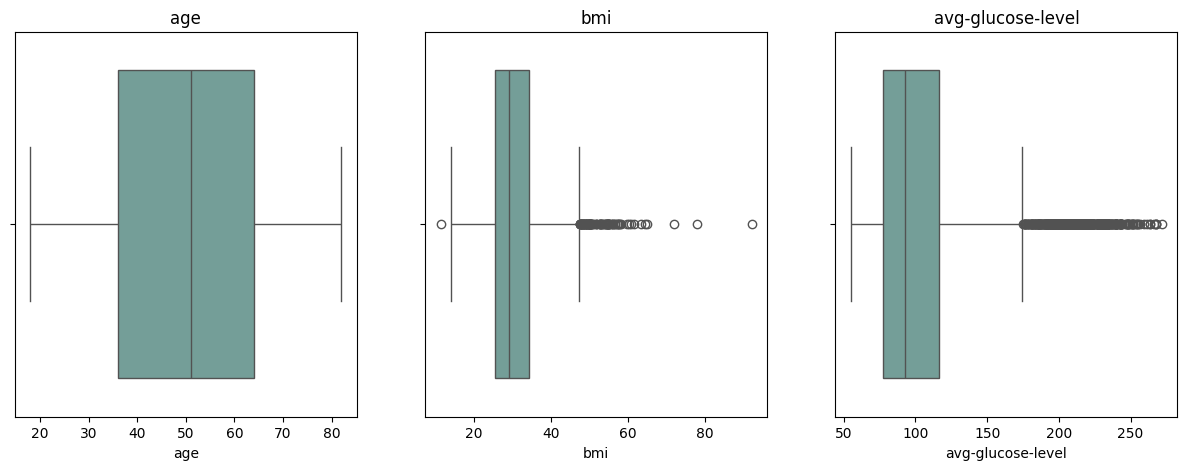

In [5687]:
num_cols = ['age','bmi','avg-glucose-level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [5688]:
print(df[df['bmi'] < 12])

     gender   age  hypertension  heart-disease ever-married work-type  \
2187   Male  40.0             0              0          Yes   Private   

     Residence-type  avg-glucose-level   bmi smoking-status  stroke  
2187          Rural              60.96  11.5   never smoked       0  


In the paper, the autors have removed the single lowest bmi value. We have done the same.

In [5689]:
df = df[df['bmi'] > 12]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


## Exploratory Data Analysis

In [5690]:
stroke_count =df['stroke'].value_counts() # pandas serie, it contains the number of '1' (stroke) and the number of '0' (no stroke)
print("Stroke percentage: {:.2f}%".format(100 * (stroke_count[1] / (stroke_count[0] + stroke_count[1]))))

Stroke percentage: 5.53%


In [5691]:
gender_count = df['gender'].value_counts()
print('Number of males: ', gender_count['Male'])
print('Number of females: ', gender_count['Female'])

Number of males:  1260
Number of females:  1994


In [5692]:
hypertension_count =df['hypertension'].value_counts()
print("Hypertension percentage: {:.2f}%".format(100 *( hypertension_count[1]/(hypertension_count[0]+hypertension_count[1]))))

Hypertension percentage: 12.54%


In [5693]:
heart_disease_count =df['heart-disease'].value_counts()
print("Hearth disease percentage: {:.2f}%".format(100 * (heart_disease_count[1]/(heart_disease_count[0]+heart_disease_count[1]))))

Hearth disease percentage: 6.33%


In [5694]:
ever_married_count =df['ever-married'].value_counts()
print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))

Married percentage: 79.84%


C:\Users\hp\AppData\Local\Temp\ipykernel_7772\140164340.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))


In [5695]:
work_type_count =df['work-type'].value_counts()
print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Gov percentage: {:.2f}%".format(100 * (work_type_count[2]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Never Worked fraction: {:.1f}%".format(100 * (work_type_count[3]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))

Private percentage: 65.03%
Self-employed percentage: 19.21%
Gov percentage: 15.67%
Never Worked fraction: 0.1%


C:\Users\hp\AppData\Local\Temp\ipykernel_7772\2819490883.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_7772\2819490883.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_7772\2819490883.py:4: FutureWarning: Series.__getitem__ tre

In [5696]:
residence_type_count =df['Residence-type'].value_counts()
print("Urban percentage: {:.2f}%".format(100 * (residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))))
print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))))

Urban percentage: 51.14%
Rural pergentage: 48.86%


C:\Users\hp\AppData\Local\Temp\ipykernel_7772\159459921.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Urban percentage: {:.2f}%".format(100 * (residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_7772\159459921.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))))


In [5697]:
smoking_status_count =df['smoking-status'].value_counts()
print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Smokes fraction: {:.2f}%".format(100 * (smoking_status_count[2]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))

Never Smoked fraction: 52.64%
Formely Smoked fraction: 24.98%
Smokes fraction: 22.37%


C:\Users\hp\AppData\Local\Temp\ipykernel_7772\4037653718.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_7772\4037653718.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_7772\4037653718.py:4: FutureWarning: Series.__getitem__

The percentages showed above are exactly the same as the ones in the paper.

In [5698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


In [5699]:
df.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


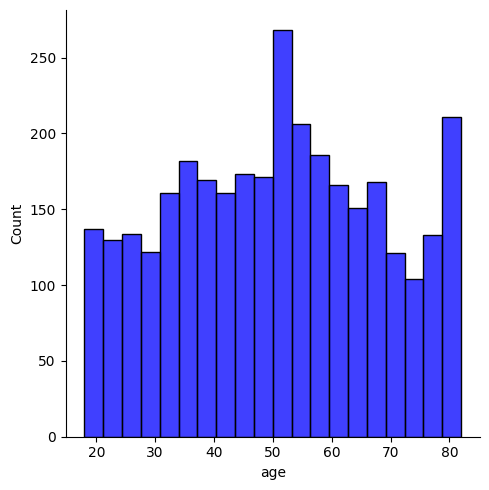

In [5700]:
sns.displot(df['age'], bins=20, kde=False, color='blue')

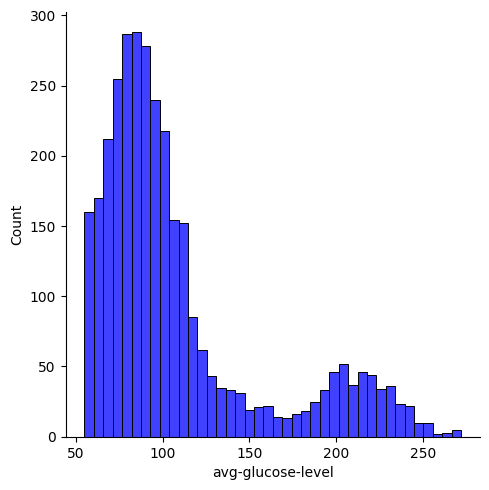

In [5701]:
sns.displot(df['avg-glucose-level'], bins=40, kde=False, color='blue')

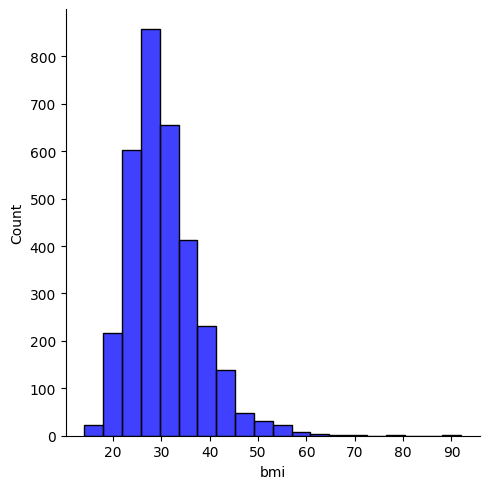

In [5702]:
sns.displot(df['bmi'], bins=20, kde=False, color='blue')

### Oversampling

In [5703]:
features = np.array(df.columns[:-1])
print(features)

X = df.drop(['stroke'], axis = 1) # Data
y = df['stroke'] # Target

['gender' 'age' 'hypertension' 'heart-disease' 'ever-married' 'work-type'
 'Residence-type' 'avg-glucose-level' 'bmi' 'smoking-status']


In [5704]:
y.value_counts()

stroke
0    3074
1     180
Name: count, dtype: int64

<AxesSubplot:ylabel='count'>

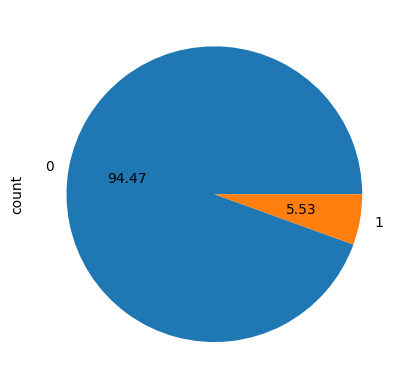

In [5705]:
y.value_counts().plot.pie(autopct = "%.2f")

We can clearly see that there is a disproportion between the number of smokers and non-smokers. This is a problem because the model could be biased towards the non-smokers. We will try to balance the dataset by oversampling the smokers.

In [5706]:
X.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


Train-Test Split

It is usually recommended to perform the oversampling only on the train dataset, therefore we will split the dataset into train and test and then oversample the train dataset.

In [5707]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # the data is split into 80% training and 20% testing randomly

In [5708]:
X_train.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
5042,Male,32.0,0,0,No,Private,Rural,100.65,26.2,formerly smoked
2095,Female,68.0,0,0,Yes,Private,Rural,97.96,31.3,never smoked
2918,Female,63.0,0,1,Yes,Self-employed,Rural,239.95,32.2,smokes
2761,Male,43.0,0,0,Yes,Private,Urban,87.82,38.8,formerly smoked
4717,Female,19.0,0,0,No,Private,Rural,66.70,24.7,never smoked


Applying the oversampling SMOTE technique

In [5709]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_tmp = X_train.copy()
y_tmp = y_train.copy()

# Apply one hot encoding
dummies = pd.get_dummies(X_tmp[cathegorical_features])
dummies_columns = dummies.columns

X_tmp = X_tmp.drop(cathegorical_features, axis=1)
X_tmp = pd.concat([X_tmp, dummies], axis=1)

tmp_features = X_tmp.columns


# Normalize the data
scaler = RobustScaler()
X_tmp = scaler.fit_transform(X_tmp, y)

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_tmp, y_tmp)

# Inverse the normalization
X_smote = scaler.inverse_transform(X_smote)

X_smote = pd.DataFrame(X_smote, columns=tmp_features)

print(dummies_columns)

X_smote[dummies_columns] = np.round(X_smote[dummies_columns])
X_smote[binary_features] = np.round(X_smote[binary_features])

dummies = pd.from_dummies(X_smote[dummies_columns], sep='_')
X_smote.drop(columns=dummies_columns, inplace=True)

X_smote = pd.concat([X_smote, dummies], axis=1)
X_smote.describe()

Index(['gender_Female', 'gender_Male', 'ever-married_No', 'ever-married_Yes',
       'work-type_Govt_job', 'work-type_Never_worked', 'work-type_Private',
       'work-type_Self-employed', 'Residence-type_Rural',
       'Residence-type_Urban', 'smoking-status_formerly smoked',
       'smoking-status_never smoked', 'smoking-status_smokes'],
      dtype='object')


,age,hypertension,heart-disease,avg-glucose-level,bmi
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000
mean,58.575499,0.195192,0.109413,121.710424,30.830593
std,17.013303,0.396388,0.312189,57.312020,6.486608
min,18.000000,0.000000,0.000000,55.120000,14.100000
25%,47.000000,0.000000,0.000000,78.967500,26.500000
50%,61.000000,0.000000,0.000000,97.480000,29.900000
75%,73.123380,0.000000,0.000000,175.306217,34.247176
max,82.000000,1.000000,1.000000,267.600000,92.000000


In [5710]:
X_balanced = X_smote.copy()
y_balanced = y_smote.copy()

X_train = X_smote.copy()
y_train = y_smote.copy()

In [5711]:
df_balanced = X_balanced
df_balanced['stroke'] = y_balanced
df_balanced.head()

,age,hypertension,heart-disease,avg-glucose-level,bmi,gender,ever-married,work-type,Residence-type,smoking-status,stroke
0,32.0,0.0,0.0,100.65,26.2,Male,No,Private,Rural,formerly smoked,0
1,68.0,0.0,0.0,97.96,31.3,Female,Yes,Private,Rural,never smoked,0
2,63.0,0.0,1.0,239.95,32.2,Female,Yes,Self-employed,Rural,smokes,0
3,43.0,0.0,0.0,87.82,38.8,Male,Yes,Private,Urban,formerly smoked,0
4,19.0,0.0,0.0,66.70,24.7,Female,No,Private,Rural,never smoked,0


In [5712]:
df_balanced.describe()

,age,hypertension,heart-disease,avg-glucose-level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000
mean,58.575499,0.195192,0.109413,121.710424,30.830593,0.500000
std,17.013303,0.396388,0.312189,57.312020,6.486608,0.500051
min,18.000000,0.000000,0.000000,55.120000,14.100000,0.000000
25%,47.000000,0.000000,0.000000,78.967500,26.500000,0.000000
50%,61.000000,0.000000,0.000000,97.480000,29.900000,0.500000
75%,73.123380,0.000000,0.000000,175.306217,34.247176,1.000000
max,82.000000,1.000000,1.000000,267.600000,92.000000,1.000000


### Graphs

<AxesSubplot:xlabel='stroke', ylabel='count'>

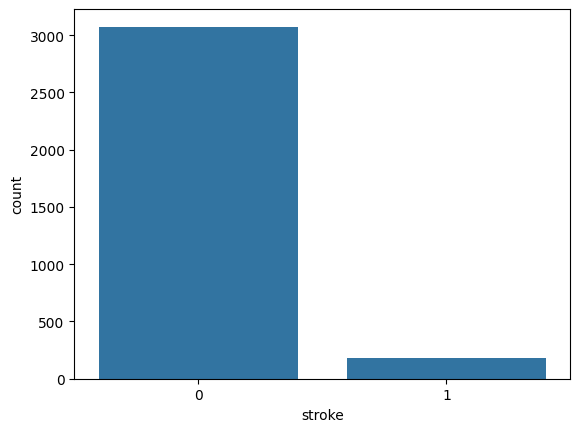

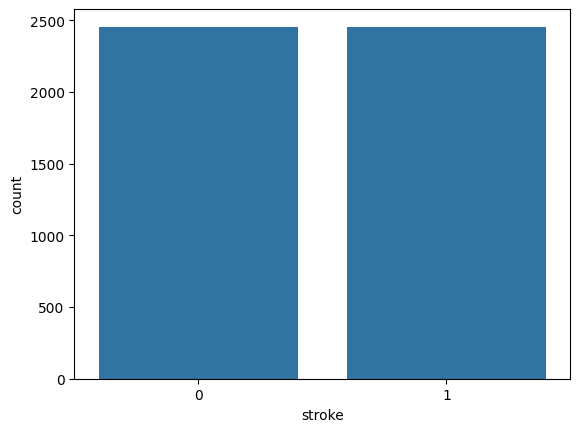

In [5713]:
sns.countplot(x='stroke', data=df)
plt.figure()
sns.countplot(x='stroke', data=df_balanced)

We can clearly see that the dataset is now balanced. The stroke and non-stroke patients are now equally represented in the train dataset.

<AxesSubplot:xlabel='age_bucket', ylabel='percent'>

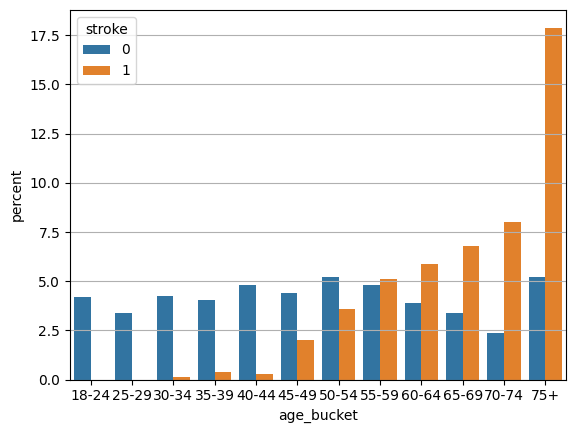

In [5714]:
plt.grid()
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']
dataset_bal_copy = df_balanced.copy()
dataset_bal_copy['age_bucket'] = pd.cut(dataset_bal_copy['age'], bins=[17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 100], labels=age_labels)
sns.countplot(x='age_bucket', hue='stroke', order=age_labels, data=dataset_bal_copy, stat='percent')

As also observed in the paper, the number of elderly patients who had a stroke is higher than the number of young patients who had a stroke. This is a common observation in the medical field.

<AxesSubplot:xlabel='hypertension', ylabel='percent'>

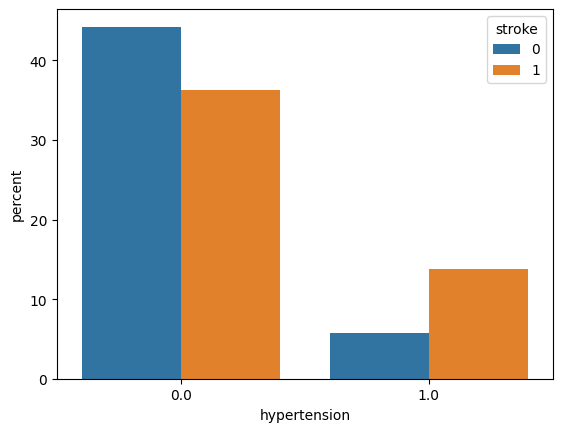

In [5715]:
sns.countplot(x='hypertension', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='heart-disease', ylabel='percent'>

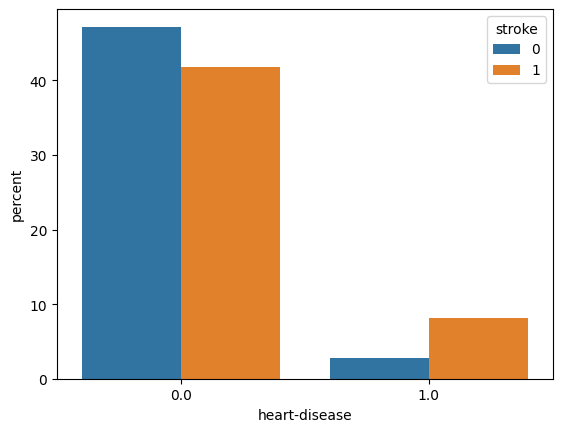

In [5716]:
sns.countplot(x='heart-disease', hue='stroke', data=df_balanced, stat='percent')

The fact that the heart disesase class seem not to contribute significantly to the model is also observed in the paper. The authors explain it as a possible consequence of the lack of screening. When hearth diseases are not found, they can not be acted on.

<AxesSubplot:xlabel='smoking-status', ylabel='percent'>

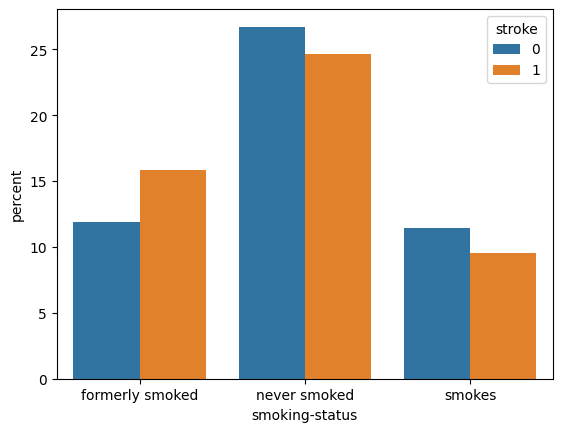

In [5717]:
sns.countplot(x='smoking-status', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='bmi_bucket', ylabel='percent'>

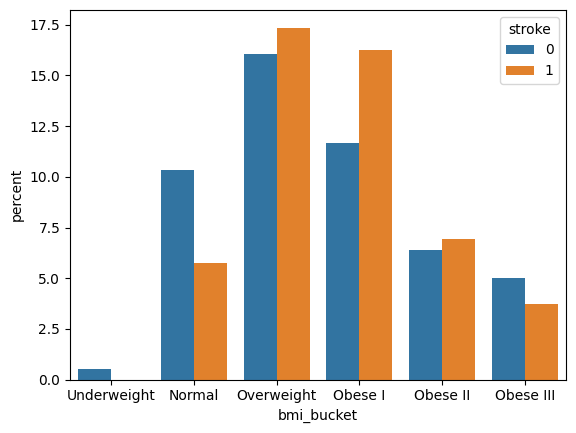

In [5718]:
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
dataset_bal_copy['bmi_bucket'] = pd.cut(dataset_bal_copy['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=bmi_labels)
sns.countplot(x='bmi_bucket', hue='stroke',order=bmi_labels,  data=dataset_bal_copy, stat='percent')

<AxesSubplot:xlabel='Residence-type', ylabel='percent'>

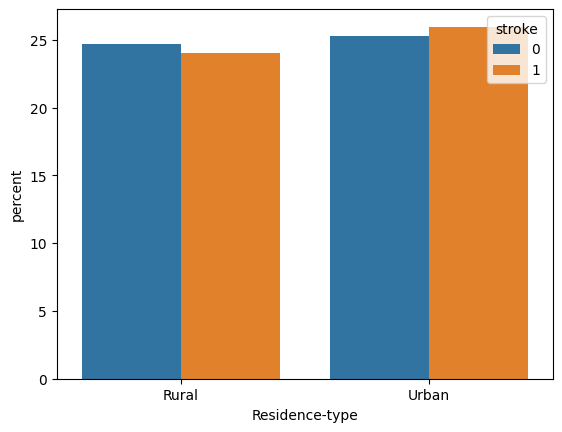

In [5719]:
sns.countplot(x='Residence-type', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='work-type', ylabel='percent'>

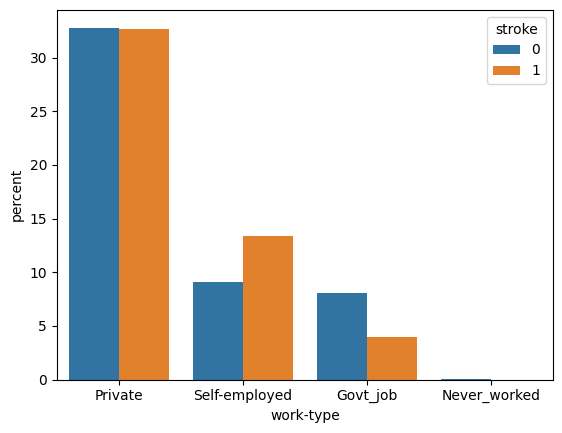

In [5720]:
sns.countplot(x='work-type', hue='stroke', data=df_balanced, stat='percent')

The private sector seems to have a higher number of stroke patients.

<AxesSubplot:xlabel='gender', ylabel='percent'>

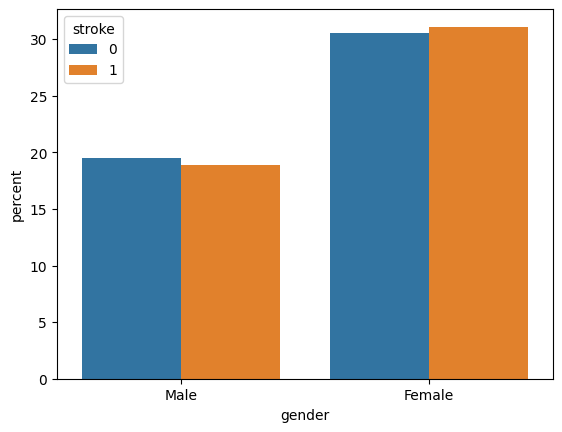

In [5721]:
sns.countplot(x='gender', hue='stroke', data=df_balanced, stat='percent')

Before proceding, we may also visualize the features correlation with a heatmap

In [5722]:
df_balanced.head()

,age,hypertension,heart-disease,avg-glucose-level,bmi,gender,ever-married,work-type,Residence-type,smoking-status,stroke
0,32.0,0.0,0.0,100.65,26.2,Male,No,Private,Rural,formerly smoked,0
1,68.0,0.0,0.0,97.96,31.3,Female,Yes,Private,Rural,never smoked,0
2,63.0,0.0,1.0,239.95,32.2,Female,Yes,Self-employed,Rural,smokes,0
3,43.0,0.0,0.0,87.82,38.8,Male,Yes,Private,Urban,formerly smoked,0
4,19.0,0.0,0.0,66.70,24.7,Female,No,Private,Rural,never smoked,0


<AxesSubplot:>

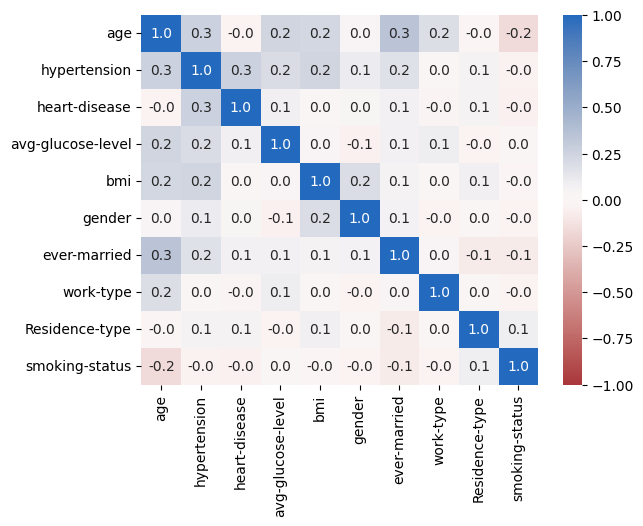

In [5723]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

data = df_balanced.drop('stroke', axis=1)

processor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('bin', 'passthrough', binary_features),
        ('cat', OrdinalEncoder(), cathegorical_features)
    ])

data = processor.fit_transform(data)

data = pd.DataFrame(data, columns=df_balanced.columns[:-1])

sns.heatmap(data.corr(), vmax=1, vmin=-1, cmap='vlag_r', annot=True, fmt='.1f')

By plotting the correlation between the features, we can see that there is no strong correlation between the features. This is good because it means that the features are independent of each other.

## Feature Ranking

In [5724]:
X_train.head()

,age,hypertension,heart-disease,avg-glucose-level,bmi,gender,ever-married,work-type,Residence-type,smoking-status
0,32.0,0.0,0.0,100.65,26.2,Male,No,Private,Rural,formerly smoked
1,68.0,0.0,0.0,97.96,31.3,Female,Yes,Private,Rural,never smoked
2,63.0,0.0,1.0,239.95,32.2,Female,Yes,Self-employed,Rural,smokes
3,43.0,0.0,0.0,87.82,38.8,Male,Yes,Private,Urban,formerly smoked
4,19.0,0.0,0.0,66.70,24.7,Female,No,Private,Rural,never smoked


In [5725]:
X_test.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
2139,Male,41.0,0,0,Yes,Self-employed,Rural,80.42,33.4,formerly smoked
5007,Female,59.0,0,0,Yes,Govt_job,Urban,101.19,29.9,formerly smoked
4719,Female,79.0,0,0,Yes,Govt_job,Rural,90.16,34.4,never smoked
98,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked
2865,Male,58.0,0,0,Yes,Private,Urban,69.24,27.6,never smoked


<AxesSubplot:xlabel='stroke', ylabel='count'>

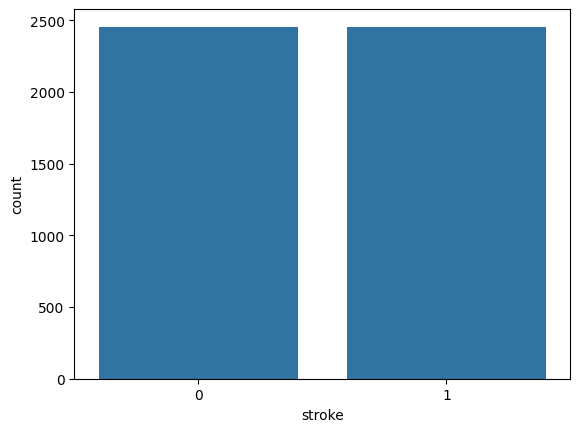

In [5726]:
df_train = X_train.copy()
df_train['stroke'] = y_train

sns.countplot(x='stroke', data=df_train)

### Apply the random forest classifier to select the most important features

gender gender_Female
gender gender_Male
age age
hypertension hypertension
heart-disease heart-disease
ever-married ever-married_No
ever-married ever-married_Yes
work-type work-type_Govt_job
work-type work-type_Never_worked
work-type work-type_Private
work-type work-type_Self-employed
Residence-type Residence-type_Rural
Residence-type Residence-type_Urban
avg-glucose-level avg-glucose-level
bmi bmi
smoking-status smoking-status_formerly smoked
smoking-status smoking-status_never smoked
smoking-status smoking-status_smokes


<BarContainer object of 10 artists>

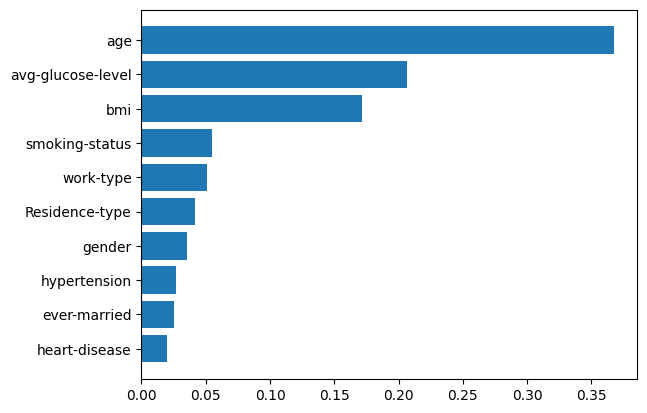

In [5727]:
from sklearn.ensemble import RandomForestClassifier

dataset_features = df.columns[:-1]

X_tmp = X_train.copy()
y_tmp = y_train.copy()

dummies = pd.get_dummies(X_tmp[cathegorical_features]) 
X_tmp = X_tmp.drop(cathegorical_features, axis=1)
X_tmp = pd.concat([X_tmp, dummies], axis=1)

tmp_features = X_tmp.columns

# Normalize the data
scaler = RobustScaler()
X_tmp = scaler.fit_transform(X_tmp)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_tmp, y_train)

feature_importance = list(zip(tmp_features, rf_classifier.feature_importances_))

importances = dict()
for f in dataset_features:
    importances[f] = 0

for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp
            print(f, f2)


importances = dict(sorted(importances.items(), key=lambda item: item[1]))            
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])

### Changing the encoding changes also the feature importance

[('ever-married', 0.023875084321699016), ('hypertension', 0.03295364554967062), ('Residence-type', 0.0331620255297385), ('gender', 0.03631187336182947), ('heart-disease', 0.039937165409676366), ('smoking-status', 0.04783280077781418), ('work-type', 0.05590051368640709), ('age', 0.23075768770056246), ('bmi', 0.23399912050144728), ('avg-glucose-level', 0.2652700831611552)]


<BarContainer object of 10 artists>

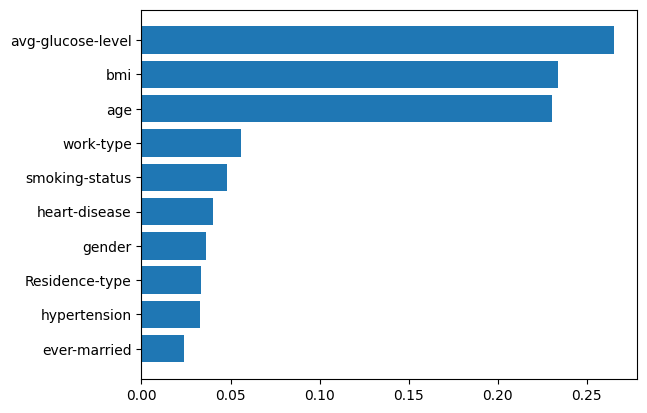

In [5728]:
from sklearn.calibration import LabelEncoder


X_tmp = X_test.copy()
y_tmp = y_test.copy()

enc = LabelEncoder()
for c in cathegorical_features:
    X_tmp[c] = enc.fit_transform(X_tmp[c])

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_tmp, y_tmp)

feature_importance = sorted(list(zip(X_tmp.columns, rf_classifier.feature_importances_)), key=lambda x: x[1])

print(feature_importance)
plt.barh([f for f, _ in feature_importance], [imp for _, imp in feature_importance])

However the first three features are always the same: age, avg_glucose_level and bmi. This is consistent with the paper.
In the first case the hypertension is not last, but in the second case it is, as in the paper.

gender gender_Female
gender gender_Male
age age
hypertension hypertension
heart-disease heart-disease
ever-married ever-married_No
ever-married ever-married_Yes
work-type work-type_Govt_job
avg-glucose-level avg-glucose-level
bmi bmi
{'Residence-type': 0, 'bmi': 0.0, 'smoking-status': 0, 'gender': 0.0027427334495908617, 'work-type': 0.005066658266837054, 'heart-disease': 0.008464425212674653, 'avg-glucose-level': 0.009189213600996338, 'age': 0.011887753235870324, 'ever-married': 0.02474886511871266, 'hypertension': 0.04629704163621384}


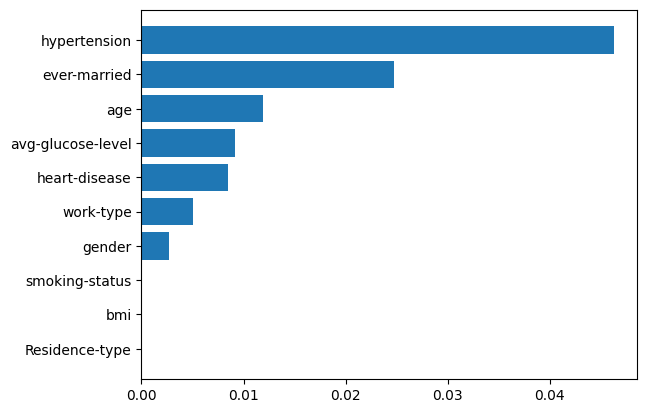

In [5729]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_tmp, y_tmp, random_state=42)

feature_importance = list(zip(tmp_features, mi))
importances = dict()
for f in dataset_features:
    importances[f] = 0

for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp
            print(f, f2)


importances = dict(sorted(importances.items(), key=lambda item: item[1]))            
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])
print(importances)

Both models predict Age to be the the most influent feature in the prediction of stroke. This is consistent with the paper. Also hypertension is among the least important features in both models. This is also consistent with the paper.

## Model training

In this section we will train each model, as specified by the paper and we will compute the specified metrics.

In [5738]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# metrics list
accuracy = dict()
precision = dict()
recall = dict()

F_metric = dict()
auc_score = dict()

### Naive Bayes
Firstly, the naive Bayes (NB) classifier was considered, which ensures probability
maximization if the features are highly independent. In the Exploratory part, we have seen that the features do not have a strong correlation between them. This is a good sign for the NB classifier.

We are going to use a Gaussian Naive Bayes classifier, which is suitable for continuous data.

In [5740]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

processor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('bool', 'passthrough', binary_features),
        ('cat', OneHotEncoder(), cathegorical_features)])


# Model definitions
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'SGD': SGDClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

for k, m in models.items():
    pipeline = Pipeline([
        ('processor', processor),
        ('model', m)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy[k] = accuracy_score(y_test, y_pred)
    precision[k] = precision_score(y_test, y_pred)
    recall[k] = recall_score(y_test, y_pred)
    F_metric[k] = f1_score(y_test, y_pred)
    auc_score[k] = roc_auc_score(y_test, y_pred)

    print("Model ", k)
    print("Accuracy: ", accuracy[k])
    print("Precision: ", precision[k])
    print("Recall: ", recall[k])
    print("F1 score: ", F_metric[k])
    print("AUC: ", auc_score[k])
    print("-------------------------")

[[150   0]
 [470  31]]
Accuracy:  0.2780337941628264
Precision:  0.06187624750499002
Recall:  1.0
F1 score:  0.11654135338345864
AUC:  0.6209677419354839
[[446   6]
 [174  25]]
Accuracy:  0.7235023041474654
Precision:  0.12562814070351758
Recall:  0.8064516129032258
F1 score:  0.21739130434782608
AUC:  0.7629032258064516
[[453   7]
 [167  24]]
Accuracy:  0.7327188940092166
Precision:  0.1256544502617801
Recall:  0.7741935483870968
F1 score:  0.21621621621621623
AUC:  0.7524193548387097
[[504  23]
 [116   8]]
Accuracy:  0.7864823348694316
Precision:  0.06451612903225806
Recall:  0.25806451612903225
F1 score:  0.1032258064516129
AUC:  0.535483870967742
[[541  25]
 [ 79   6]]
Accuracy:  0.8402457757296466
Precision:  0.07058823529411765
Recall:  0.1935483870967742
F1 score:  0.10344827586206896
AUC:  0.5330645161290323
[[579  30]
 [ 41   1]]
Accuracy:  0.890937019969278
Precision:  0.023809523809523808
Recall:  0.03225806451612903
F1 score:  0.0273972602739726
AUC:  0.4830645161290323
[[5

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


TypeError: float() argument must be a string or a real number, not 'dict'

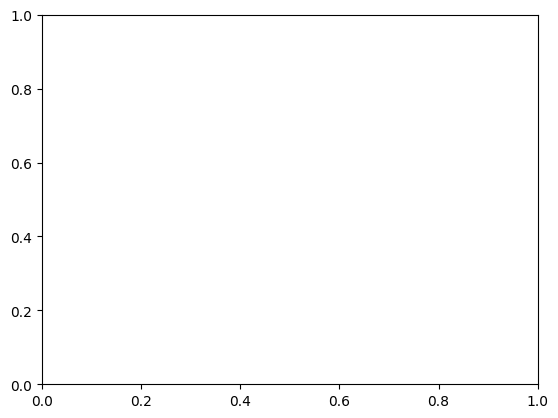

In [5741]:
plt.plot(accuracy)